<a href="https://colab.research.google.com/github/JunYoung07/Hands-On_Machine_Learning/blob/main/3_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter4. 모델 훈련 (Model Training)

* 적절한 모델, 올바른 훈련 알고리즘, 작업에 맞는 좋은 하이퍼파라미터를 찾을 수 있다.
* 작동 원리를 이해하고 있으면 디버깅이나 에러를 효율적으로 분석하는 데 도움이 된다.


## 4-1. 선형 회귀
* 선형 회귀 모델
    * 수학적으로 모델 파라미터 구하기
    * 경사하강법 적용 모델 훈련
        * 배치 경사 하강법
        * 미니배치 경사 하강법
        * 확률적 경사하강법

#### 선형 회귀 모델 함수
* 한개의 특성 $x_1$을 사용하는 $i$번째 훈련 샘플에 대한 예측값  
$$\hat{y}^{(i)} = \theta_0 + \theta_1 x_1^{i}  $$
* n $≥$ 1개의 특성을 사용하는 $i$번째 훈련 샘플에 대한 예측값
$$\hat{y}^{(i)} = \theta_0 + \theta_1 x_1^{(i)} + ⋯ + \theta_n x_n^{(i)}$$
    * $\hat{y}$은 예측값
    * $n$은 특성의 수
    * $x_i$는 $i$번째 특성값
    * $\theta_j$는 $j$번째 모델 파라미터(편향 $\theta_0$과 특성의 가중치 $\theta_1, \theta_2, ⋯, \theta_n$을 포함한다.) 

#### 선형 회귀 모델의 예측(벡터 형태)
$$\hat{y} = h_\theta(x) = \theta x$$  
* $\theta$는 편향과 특성 가중치를 담은 모델의 파라미터 벡터  
* $x$는 샘플의 특성 벡터 $x_0$는 항상 1이다
* $h_\theta$는 $\theta$를 사용한 가설함수

#### 파이썬 넘파이 2차원 어레이 표현
|데이터|행렬 기호|수학 행렬 모양(shape)|넘파이 어레이 모양|
|---:|---:|---:|---:|
|레이블, 예측값|$y, \hat{y}$|m$×$ 1|(m, 1)|
|가중치|$\theta$|(n + 1) $×$ 1|(n+1, 1)|
|훈련 세트|$𝐗$|m $×$ n|(m, n)|
|훈련 세트(수정)|$𝐗_b$|m $×$ (n + 1)|(m, n+1)|

#### 비용함수: 평균 제곱 오차(MSE)
* 선형 회귀 모델을 구한 뒤 모델 훈련
     * 모델 훈련이란 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것
* MSE를 활용한 선형 회귀 모델 성능 평가
$$MSE(𝐗, h_\theta) = \frac{1}{m}\displaystyle\sum_{i=1}^{m}(\theta^Tx^{(i)} - y^{(i)})^2$$
* 간단한 표현:
$$ MSE(\theta) := MSE(𝐗, h_\theta)$$


#### 목표: 비용함수 최소화
* 이유: $𝐗, m, x_b, y^{(i)}$은 모두 주어진 상수값들임
* 목표: $MSE(\theta)$가 최소가 되도록하는 $\theta$(모델 파라미터) 찾기
* 두가지 방법
    * 방법 1: 정규방정식 또는 특이값 분해(SVD)활용
        * 드물지만 수학적으로 비용함수를 최소화하는 $\theta$값을 직접 계산할 수 있는 경우 활용
        * 계산복잡도가 $O(n^2)$이상인 행렬 연산을 수행
        * 따라서 특성 수($n$)이 큰 경우 메모리 관리 및 시간복잡도 문제때문에 비효율적
    * 방법 2: 경사하강법
        * 특성 수가 매우 크거나 훈련 샘플이 너무 많아 메모리에 모두 담을 수 없을 때 적합
        * 일반적으로 선형 회귀 모델 훈련에 적용되는 기법

### 4-1-1. 정규방정식
* 비용 함수를 최소화하는 $\theta$값을 찾기 위한 **해석적인 방법** (결과를 바로 얻을 수 있는 수학 공식)
$$\hat{\theta} = (𝐗^T𝐗)^{-1}𝐗^Ty$$
    * $\hat{\theta}$은 비용 함수를 최소화하는 $\theta$값
    * $y$는 $y^{(1)}$부터 $y^{(m)}$까지 포함하는 타깃 벡터

In [43]:
import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [44]:
# 유사선형 데이터 생성
X = 2 * np.random.rand(100, 1)  # 0~1의 균일 분포 표준정규분포 난수를 matrix array(100, 1)로 생성
y = 4 + 3 * X + np.random.randn(100, 1) # 평균0, 표준편차 1의 가우시안 표준정규분포 난수를 amtrix array(100, 1)로 생성

<function matplotlib.pyplot.show(*args, **kw)>

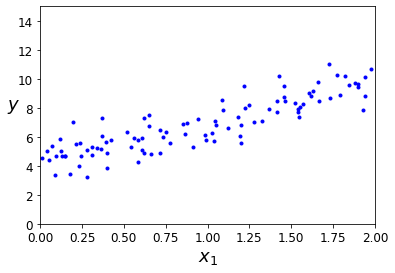

In [45]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation = 0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show

In [46]:
# 정규방정식을 사용해 theta계산
# np.linalg.inv(): 역행렬 계산
# np.linalg.dot(): 점곱 계산
X_b = np.c_[np.ones((100, 1)), X]   # 모든 샘플에 x0 = 1 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
X_b

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904],
       [1.        , 0.11616722],
       [1.        , 1.73235229],
       [1.        , 1.20223002],
       [1.        , 1.41614516],
       [1.        , 0.04116899],
       [1.        , 1.9398197 ],
       [1.        , 1.66488528],
       [1.        , 0.42467822],
       [1.        , 0.36364993],
       [1.        , 0.36680902],
       [1.        , 0.60848449],
       [1.        , 1.04951286],
       [1.        , 0.86389004],
       [1.        , 0.58245828],
       [1.        , 1.22370579],
       [1.        , 0.27898772],
       [1.        , 0.5842893 ],
       [1.        , 0.73272369],
       [1.        , 0.91213997],
       [1.        , 1.57035192],
       [1.        , 0.39934756],
       [1.        , 1.02846888],
       [1.        , 1.18482914],
       [1.        , 0.09290083],
       [1.

In [47]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [48]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict   # X가 0과 2일때의 예측값

array([[4.21509616],
       [9.75532293]])

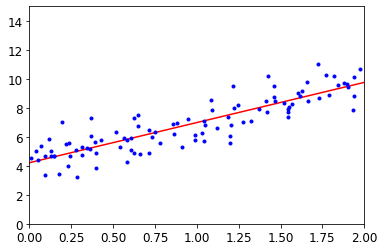

In [49]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

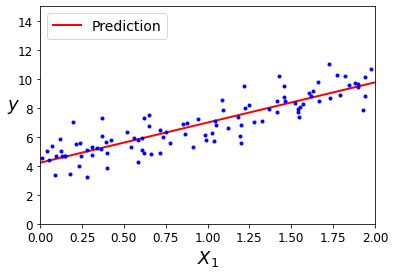

In [50]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Prediction")
plt.plot(X, y, "b.")
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show

#### 사이킷런에서 선형 회귀 수행하기

In [51]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [52]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [53]:
# Linearregression 클래스는 scipy.linalg.lstsq()함수를 사용하므로 이 함수를 직접 사용할 수 있다.
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [54]:
# np.linalg.pinv()를 사용해 유사역행렬을 직접 계산
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

### 4-1-2. 계산 복잡도
* 정규방정식은 $(n+1)×(n+1)$크기의 역행렬을 계산
    * 일반적으로 $O(n^{2.4})$에서 $O(n^3)$사이의 계산복잡도
* 특성의 수가 2배로 늘어난경우 계산시간이 5.3~8배 증가한다.
* 사이킷런의 `LinearRegression`은 $O(n^2)$만큼의 시간복잡도를 가짐
* 선형회귀모델은 예측의 속도가 매우 빠르다
    * 예측 계산복잡도는 샘플 수와 특성 수에 선형적

## 4-2. 경사 하강법(Gradient descent)
* 특성이 매우 많고 훈련 샘플이 너무 많아 메모리에 모두 담을 수 없는 경우
    * 훈련 세트를 이용한 훈련 과정 중에 가중치 등과 같은 **파라미터를 조금씩 반복적으로 조정**
    * 조정 기준: 비용 함수의 크기 줄이기
* 최적 학습 모델
    * 비용함수를 최소화하는 또는 효용함수를 최대화하는 파라미터를 사용하는 모델
* **파라미터**
    * 예측값을 생성하는 함수로 구현되는 학습 모델에 사용되는 파라미터
* **하이퍼파라미터**
    * 학습 모델을 지정할 때 사용되는 값
    * 학습률, 배치 크기, 에포크, 허용오차, ...
        * 에포크(epoch): 훈련 세트 전체를 대상으로 훈련하는 단계
            * 에포크 수: 전체 훈련 세트를 몇 번 반복 학습할 지 결정
        * 배치(batch) 크기: 파라미터를 업데이트하기 위해, 즉 그레이디언트 벡터를 계산하기 위해 필요한 훈련 샘플 수
        * 허용오차(tolerance): 비용함수의 그레이디언트 벡터의 크기가 허용오차보다 작아지면 학습 종료
* **비용함수**
    * 모델이 얼마나 나쁜지를 계산해주는 함수
    * 최적 학습 모델은 비용함수가 최소가 되도록 하는 모델
* **전역 최솟값**
    * 비용함수가 가질 수 있는 최솟값
* **그레이디언트 벡터**
    * 다변수 함수의 미분값
    * 여러 개의 값으로 이루어진 벡터로 계산됨
    * (그레이디언트)벡터는 방향과 크기에 대한 정보 제공
    * 그레이디언트가 가리키는 방향의 반대 방향으로 움직여야 가장 빠르게 전역최솟값에 접근  
$$\nabla_\theta \textrm{MSE}(\theta) =
\begin{bmatrix}
    \frac{\partial}{\partial \theta_0} \textrm{MSE}(\theta) \\
    \frac{\partial}{\partial \theta_1} \textrm{MSE}(\theta) \\
    \vdots \\
    \frac{\partial}{\partial \theta_n} \textrm{MSE}(\theta)
\end{bmatrix} =
\frac{2}{m}\, \mathbf{X}_b^T\, (\mathbf{X}_b\, \theta - \mathbf y)$$
* **학습률**
    * 훈련 과정에서의 비용함수 파라미터 조정 비율
* **스텝**(step)
    * 지정된 배치 크기의 샘플을 학습한 후에 파라미터를 조정하는 단계
    * 훈련 세트의 크기가 1000이고 배치 크기가 10이면, 하나의 에포크 기간동안 총 100번의 스텝이 실행됨
    * 스텝 크기 = (훈련 샘플 수)/(배치 크기)
    * 경우에 따라 배치 크기 대신에 스텝 크기가 하이퍼파라미터로 주어짐
* **학습률과 모델 학습**
    * $\theta$를 임의의 값으로 지정한 후 훈련 시작
    * 아래 단계를 $\theta$가 특정 값에 지정된 오차범위 내로 수렴할 때까지 반복
        1. (배치 크기로)지정된 수의 훈련 샘플을 이용하여 학습
        2. 학습 후 $MSE(\theta)$계산
        3. 이전 $\theta$에서 그레이디언트 백터와 학습률을 곱한 값 빼기  
$$\theta^{(\text{new})} = \theta^{(\text{old})}\, -\, \eta\cdot \nabla_\theta \textrm{MSE}(\theta^{(\text{old})})$$
![ScreenShot](https://formal.hknu.ac.kr/handson-ml2/slides/images/ch04/homl04-01.png)
> 모델 파라미터가 무작위하게 초기화된 후 반복적으로 수정되어 비용 함수를 최소화 한다.
* **에포크와 허용오차**
    * 에포크 수는 크게 설정한 후 허용오차를 지정하여 학습시간 제한 필요
    * 이유: 포물선의 최솟점에 가까워질 수록 그레이디언트 벡터의 크기가 0에 수렴
    * 허용오차와 에포크 수는 서로 반비례의 관계
        * 즉, 오차를 1/10으로 줄이려면 에포크 수를 10배 늘려야 한다.

* 경사 하강법에서 중요한 파라미터는 스텝의 크기로, **학습률** 하이퍼파라미터로 결정
1. 학습률이 너무 작은 경우
    * 알고리즘이 수렴하기 위해 반복을 많이 진행 -> 시간이 오래 걸린다.
![Screenshot](https://formal.hknu.ac.kr/handson-ml2/slides/images/ch04/homl04-02.png)
2. 학습률이 너무 큰 경우
    * 비용함수가 수렴하지 않음
![ScreenShot](https://formal.hknu.ac.kr/handson-ml2/slides/images/ch04/homl04-03.png)
3. 비용 함수의 모양이 특이한 경우
    * **전역최솟값**보다 덜 좋은 **지역최솟값**에 수렴한다
![ScreenShot](https://formal.hknu.ac.kr/handson-ml2/slides/images/ch04/homl04-04.png)
> 경사 하강법을 사용할 때는 반드시 모든 특성이 같은 스케일을 갖도록 만들어야 한다. (사이킷런 `StandardScaler`사용)

#### 선형 회귀를 위한 MSE 비용함수
* 선형회귀의 비용함수는 곡선 위의 임의의 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 볼록함수
    * 지역 최솟값이 존재하지 않으며 전역 최솟값만 존재한다.
* 학습률이 너무 크지 않으면 언젠가는 전역 최솟값에 수렴한다.


### 4-2-1. 배치 경사 하강법
* 각 모델 파라미터 $\theta_j$에 대해 비용 함수의 그레이디언트를 계산
    * **편도함수**: $\theta_j$가 조금 변경될 때 비용 함수가 얼마나 바뀌는 지 계산해야 함


In [55]:
eta = 0.1  # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # 랜덤 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [56]:
theta

array([[4.21509616],
       [2.77011339]])

In [57]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [58]:
# 학습률에 따른 수렴 그래프 그리기
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = 'r-' if iteration > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

<function matplotlib.pyplot.show(*args, **kw)>

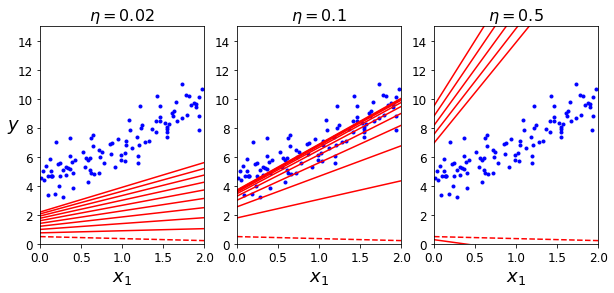

In [59]:
np.random.seed(42)
theta = np.random.randn(2, 1)

plt.figure(figsize=(10, 4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show

* 학습률이 0.02인 경우:
    * 학습률이 너무 낮음
    * 알고리즘은 최적점에 도달하지만, 시간이 오래 걸림
* 학습률이 0.5인 경우
    * 학습률이 높음
    * 알고리즘이 스텝마다 최적점에서 점점 더 멀어져 발산한다.
* 적절한 학습률을 찾기 위해
    * 그리드 탐색을 사용한다.
        * 수렴하는 데 너무 오래 걸리는 모델을 막기 위해 반복 횟수를 제한
        

### 4-2-2. 확률적 경사 하강법
* 배치 경사 하강법은 매 스텝에서 전체 훈련 세트를 사용해 그레이디언트를 계산한다는 한계를 가짐 (훈련 세트가 매우 커지면 매우 느리다)
* **확률적 경사 하강법**은 매 스텝에서 하나의 샘플을 무작위로 선택하고 그 하나에 대해서만 그레이디언트를 계산
* **장점**
    * 매우 큰 훈련 세트를 다룰 수 있다
        * 외부 메모리(out-of-core)학습을 활용할 수 있음
    * 학습 과정이 매우 빠름
    * 파라미터 조정이 불안정 할 수 있기 때문에 지역 최솟값에 상대적으로 덜 민감
* **단점**
    * 학습 과정에서 파라미터의 동요가 심할 수 있음
    * 경우에 따라 전역 최솟값에 수렴하지 못하고 계속해서 발산할 가능성도 높음

* **학습 스케쥴**
    * 요동치는 파라미터를 제어하기 위해 학습률을 학습 과정 동안 천천히 줄어들게 만들 수 있음
    * 주의 사항
        * 학습률이 너무 빠리 줄어들면, 지역 최솟값에 갇힐 수 있음
        * 학습류링 너무 느리게 줄어들면 전역 최솟값에 제대로 수렴하지 못하고 맴돌 수 있음
    * 학습 스케쥴(learning schedule)
        * 에포크, 훈련 샘플 수, 학습되는 샘플의 인덱스에 따른 학습률 지정

In [60]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [61]:
theta

array([[4.20742938],
       [2.74264448]])

In [62]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

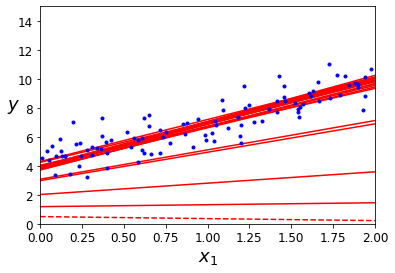

In [63]:
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 랜덤 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "r-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)     
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)             

plt.plot(X, y, "b.")                             
plt.xlabel("$x_1$", fontsize=18)                   
plt.ylabel("$y$", rotation=0, fontsize=18)         
plt.axis([0, 2, 0, 15])                            
                     
plt.show()                                           

In [64]:
theta

array([[4.21076011],
       [2.74856079]])

* **사이킷 런의 `SGDRegressor`**
    * 경사 하강법 지원
    * 사용되는 하이퍼파라미터
        * `max_iter`: 에포크 수 제한
        * `tol`: 허용 오차
        * `eta=0.1`: `SGDRegressor`가 사용하는 학습 스케줄 함수에 사용되는 매개 변수. 일종의 학습률
        * `penalty`: 규제 사용 여부

In [65]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [66]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

### 4-2-3. 미니배치 경사 하강법
* **미니배치**라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트 계산
* **장점**
    * 배치 크기를 어느 정도 크게 하면 확률적 경사 하강법(SGD)보다 파라미터의 움직임이 덜 불규칙적
    * 배치 경사 하강법보다 빠르게 학습
    * 학습 스케줄 사용가능
* **단점**
    * SGD에 비해 지역 최솟값에 수렴할 위험도 커짐

In [67]:
theta_path_mgd = []

n_ierations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t+t1)

t=0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [68]:
theta

array([[4.20887719],
       [2.76284597]])

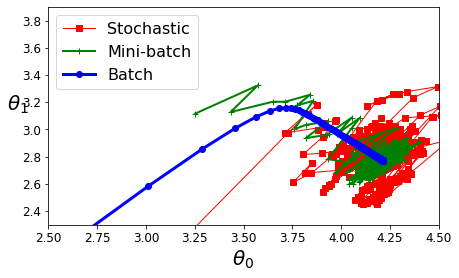

In [69]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

## 선형 회귀 알고리즘 비교
|알고리즘|많은 샘플 수|외부 메모리 학습|많은 특성 수|하이퍼 파라미터 수|스케일 조정|사이킷런 지원|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|정규방정식|빠름|지원 안됨|느림|0|불필요|지원 없음|
|SVD|빠름|지원 안됨|느림|0|불필요|Linear Regression|
|배치 GD|느림|지원 안됨|빠름|2|필요|LogisticRegression|
|SGD|빠름|지원|빠름|>=2|필요|SGDRegressor|
|미니배치 GD|빠름|지원|빠름|>=2|필요|지원 없음|

## 4-3. 다항 회귀
* 비선형 데이터를 학습하는 데 선형 모델을 사용할 수 있다
* 다항 회귀 기본 아이디어
    * 특성 조합 활용
    * 각 특성의 거듭제곱을 새로운 특성으로 추가
    * 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련

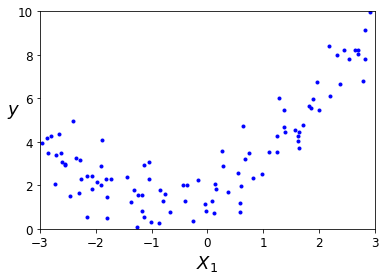

In [70]:
# 2차 방정식 비선형 데이터 회귀
import numpy as np
import numpy.random as rnd

np.random.seed(42)

m= 100
X = 6*np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, 'b.')
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [71]:
# 훈련 세트에 있는 각 특성을 제곱(2차 다항)하여 새로운 특성으로 추가 (특성 하나가 추가)
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [72]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [73]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

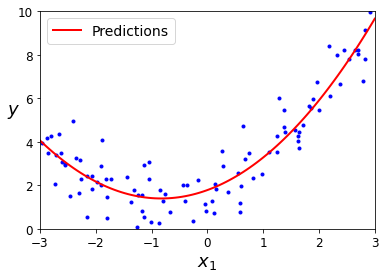

In [74]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

plt.show()

* 특성이 여러개 인 경우
    * 특성 사이의 관계를 찾을 수 있다. (일반 선형 회귀 모델과의 차이)
    * `PolynomialFeatures`가 주어진 차수까지 특성 간의 모든 교차항을 추가함
        * 주어진 특성들의 거듭제곱과 특성들 사이의 곱셈을 실행하여 특성을 추가하는 기능
        * `degree=d`하이퍼파라미터 지정
        * n=2, d=3: $(x_1+x_2)^2 + (x_1+x_2)^3$의 항목에 해당하는 7개의 특성 추가  

$$x_1^2,\,\, x_1 x_2,\,\, x_2^2,\,\, x_1^3,\,\, x_1^2 x_2,\,\, x_1 x_2^2,\,\, x_2^3$$



## 4-4. 학습 곡선
* 고차 다항 회귀 사용 시
    * 선형 회귀에 비해 훨씬 더 많은 훈련 데이터에 맞추려 한다.
![ScreenShot](https://formal.hknu.ac.kr/handson-ml2/slides/images/ch04/homl04-08.png)
    

> 다항 회귀 모델의 차수에 따라 훈련된 모델이 훈련 세트에 과소 또는 과대 적합될 수 있다.


#### 교차 검증 vs. 학습 곡선
* 교차 검증
    * 과소적합: 훈련 세트와 교차 검증 점수 모두 낮은 경우
    * 과대접합: 훈련 세트에 대한 검증은 우수하지만 교차 검증 점수가 낮은 경우
* 학습 곡선 살피기
    * **학습 곡선**: 훈련 세트와 검증 세트에 대한 모델 성능을 비교하는 그래프
        * 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기 (또는 훈련 반복)의 함수로 나타낸다
        * 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련
    * 학습 곡선의 모양에 따라 과소적합/과대적합 판정 가능

In [75]:
# 훈련 데이터에서 모델의 학습 곡선을 그리는 함수 정의
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validation")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

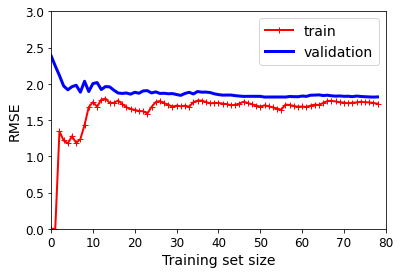

In [76]:
# 선형 모델에 대한 학습곡선
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

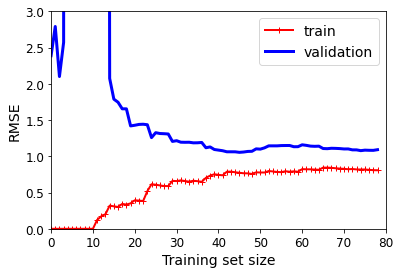

In [77]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

#### 학습 곡선 비교
* 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮다
* 두 곡선 사이에 공간이 있다
    * 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다
    * 과대적합 모델의 특징
    * 훈련세트의 크기가 커질수록 두 곡선이 점점 가까워진다.

> 과대적합 모델을 개선하기 위해서는 훈련 오차에 근접할 때까지 더 많은 훈련 데이터를 추가한다

### 편향/분산 트레이드 오프
* 모델의 일반화 오차는 세 가지 다른 종류의 오차의 합으로 표현
* **편향**
    * 잘못된 가정으로 나온 오차
    * 편향이 큰 모델은 훈련 데이터에 과소적합되기 쉽다
* **분산**
    * 훈련 데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문에 발생
    * 자유도가 높은 모델(고차 다항 회귀 모델)이 높은 분산을 갖기 쉬워 과대적합된다.
* **줄일 수 없는 오차**
    * 데이터 자체의 잡음
    * 데이터에서 잡음을 제거한다.
        * 센서 같은 데이터 소스를 고친다
        * 이상치를 감지해 제거

> 모델의 복잡도가 커지면 분산이 늘어나고 편향이 줄어든다. 반대로 모델의 복잡도가 줄어들면 편향이 커지고 분산이 작아진다. (**트레이드오프**)

## 4-5. 규제 선형 모델
* 과대적합을 감소시키는 방법: **모델 규제**
* **자유도**(degree of freedom): 학습 모델 결정에 영향을 주는 요소(특성)들의 수
    * 단순 선형 회귀의 경우: 특성 수
    * 다항 선형 회귀의 경우: 차수
* **규제**(regularization): 자유도 제한
    * 단순 선형 회귀 모델에 대한 규제: 가중치 역할 제한
    * 다항 선형 회귀 모델에 대한 규제: 차수 줄이기
* 가중치 역할 규제 선형 회귀 모델
    * 릿지 회귀
    * 라쏘 회귀
    * 엘라스틱넷
* 규제 적용 주의사항
    * 규제항은 훈련 과정에만 사용된다.
    * 테스트 과정에는 다른 기준으로 성능을 평가한다.
        * 훈련과정: 비용 최소화 목표
        * 테스트과정: 최종 목표에 따른 성능 평가


### 4-5-1. 릿지 회귀 (Ridge)
* 티호노프 규제 (Tikhonov)
* 규제가 추가된 선형 회귀 버전
* 가중치 제곱의 합이 특정 값 이하가 되도록 규제
* 규제항이 비용함수에 추가된다.
$$J(\theta) = \textrm{MSE}(\theta) + \alpha \, \frac{1}{2} \sum_{i=1}^{n}\theta_i^2$$
    * $α$(알파): 규제 강도를 지정하는 하이퍼파라미터
    * $α = 0$: 단순 선형 회귀
    * $α$가 커질수록 가중치의 역할이 줄어듦
        * 비용을 줄이기 위해 가중치를 작게 유지하는 방향으로 학습
    * 주의사항: 훈련 세트에 대한 특성 스케일링 전처리 실행 후 적용
* 모델의 가중치가 가능한 한 작게 유지되도록 한다.


In [78]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X * np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [79]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[0.81231746]])

In [80]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[0.81231657]])

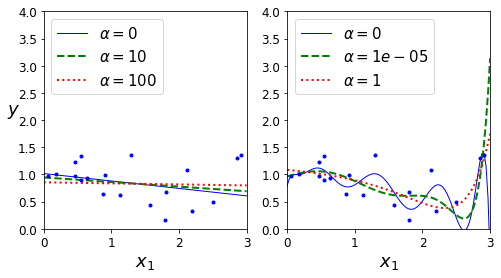

In [81]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

In [82]:
sgd_reg = SGDRegressor(penalty="l2")    # 벡터의 노름의 제곱을 2로 나눈 규제항 추가가
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([0.71880698])

### 4-5-2. 라쏘 회귀

* 릿지 회귀처럼 비용 함수에 규제항을 더함
    * 가중치 벡터의 $l_1$ 노름을 사용
$$J(\theta) = \textrm{MSE}(\theta) + \alpha \, \sum_{i=1}^{n}\mid\theta_i\mid$$
    * $\alpha$
        * 하이퍼파라미터로 지정
        * 규제 강도 지정
        * $\alpha = 0$이면 규제가 전혀 없는 기본 선형 회귀
    * $\theta_i$: 덜 중요한 특성을 무시하기 위해 $|\theta_i|$가 0에 수렴하도록 학습 유도
    * $\theta_0$는 규제하지 않음
* 덜 중요한 특성의 가중치를 제거하려고 한다.
* 가중치의 절대값의 합이 특정 값 이하가 되도록 규제
* 자동으로 특성 선택을 하고 **희소 모델**(sparse model)을 생성

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.174e-01, tolerance: 3.568e-04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


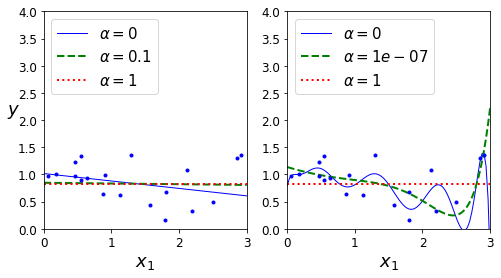

In [84]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()

In [85]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([0.82698362])

### 4-5-3. 엘라스틱넷
* 릿지 회귀와 라쏘 회귀를 절충한 모델
$$J(\theta) = \textrm{MSE}(\theta) + r\, \alpha \, \sum_{i=1}^{n}\mid\theta_i\mid + \,\frac{1-r}{2}\, \alpha\, \sum_{i=1}^{n}\theta_i^2$$
    * $r$을 이용하여 릿지 규제와 라쏘 규제를 적절하게 조절
        * $r$: 혼합비율
        * $r=0$: 릿지 회귀
        * $r=1$: 라쏘 회귀

In [86]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([0.81969978])

#### 규제의 사용 방법
* 대부분의 경우 약간이라도 규제 사용 추천
* 릿지 규제가 기본
* 유용한 속성이 많지 않다고 판단되는 경우
    * 라쏘 규제나 엘라스틱넷 활용
    * 불필요한 속성의 가중치를 0으로 만들기 때문
* 특성 수가 훈련 샘플 수보다 크거나 특성 몇 개가 강하게 연관되어 있는 경우
    * 라쏘 규제는 적절하지 않음
    * 엘라스틱넷 활용

### 4-5-4. 조기 종료
* **조기 종료**: 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것
* 반복 훈련 과정 중에 모델이 훈련 데이터에 점점 더 익숙해져서 과대적합 발생 가능
* 반복 훈련을 적절한 시기에 종료
* 반복훈련 종료 기준: 검증 데이터에 대한 손실이 줄어 들다가 다시 커지는 순간
* 매우 효과적이고 간단한 규제


In [87]:
np.random.seed(42)
m=100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m,1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [89]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 중지된 곳에서 다시 시작합니다
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

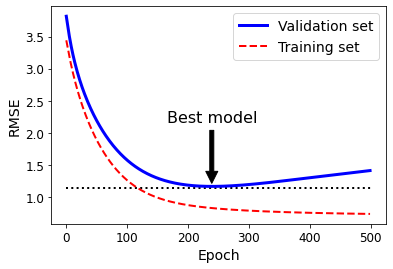

In [91]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

plt.show()

In [92]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

* 확률적 경사 하강법, 미니배치 경사 하가법의 경우 손실 곡선이 매끄럽지 않고 진동 발생
    * 검증 오차가 한동안 최솟값보다 높게 유지될 때 반복 훈련을 멈추고 검증 오차가 최소였을 때의 모델 파라미터 확인

## 4-6. 로지스틱 회귀 (Logistic regression)
* 로지스틱 회귀와 소프트맥스 회귀를 이용하여 분류 모델 학습
    * 이진 분류: 로지스틱 회귀
    * 다중 클래스 분류: 소프트 맥스 회귀 사용



### 4-6-1. 확률 추정
* 특성과 가중치의 곱한 값들을 더한 결과에 **시그모이드 함수**를 적용한 결과 이용
* 로지스틱 회귀 모델에서 샘플 $x$에 대한 예측값
$$\hat p = h_\theta (\mathbf x) = \sigma(\theta^T \, \mathbf{x}_b^T)$$
* **시그모이드 함수**
$$\sigma(t) = \frac{1}{1 + e^{-t}}$$
![ScreenShot](https://formal.hknu.ac.kr/handson-ml2/slides/images/ch04/homl04-12.png)
* 로지스틱 회귀 모델의 예측값
$$\hat y = 
\begin{cases}
0 & \text{if}\,\, \hat p < 0.5 \\
1 & \text{if}\,\, \hat p \ge 0.5
\end{cases}$$
    * $\theta^T \, \mathbf{x}_b^T \ge 0$: 양성 클래스(1)
    * $\theta^T \, \mathbf{x}_b^T < 0$: 음성 클래스(0)


### 4-6-2. 훈련과 비용함수
* 로지스틱 회귀 모델을 경사하강법을 이용하여 학습
* 비용함수: 로그 손실(log loss)함수 사용
$$J(\theta) = 
- \frac{1}{m}\, \sum_{i=0}^{m-1}\, [y^{(i)}\, \log(\,\hat p^{(i)}\,) + (1-y^{(i)})\, \log(\,1 - \hat p^{(i)}\,)]$$
* 이 비용함수에 대해 경사 하강법 적용
* 로그 손실 함수: 하나의 샘프에 대한 아래의 값의 의미 이해 중요
$$- [y^{(i)}\, \log(\,\hat p^{(i)}\,) + (1-y^{(i)})\, \log(\,1 - \hat p^{(i)}\,)]$$
* 틀린 예측을 하면 값이 커짐


### 4-6-3. 결정 경계
* 사이킷런에서 제공하는 붓꽃 데이터셋 활용
    * 4개의 특성 사용
        * 꽃받침 길이
        * 꽃받침 너비
        * 꽃잎 길이
        * 꽃잎 너비
    * 샘플 타깃
        * 0: Iris-Setosa
        * 1: Iris-Versicolor
        * 2: Iris-Virginica

In [93]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [94]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [101]:
X = iris["data"][:, 3:] # 꽃잎 너비
y = (iris["target"] == 2).astype(int)   # Iris virginica면 1 아니면 0

In [102]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

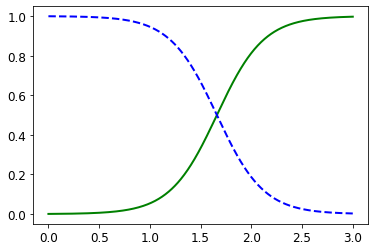

In [103]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

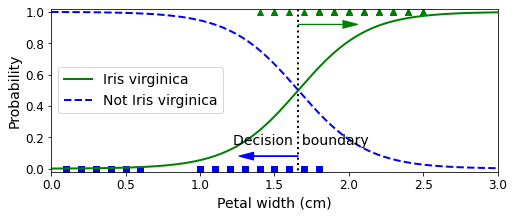

In [105]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary[0], 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary[0], 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()

In [106]:
decision_boundary

array([1.66066066])

In [108]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

#### 로지스틱 회귀 규제하기
* 하이퍼파라미터 `penalty`와 `C`이용
* `penalty`
    * l1, l2, elasticnet 세 개중 하나 사용
    * 기본은 l2
    * elasticnet을 선택한 경우 l1_ration옵션 값을 지정해서 사용
* `C`
    * 릿지 규제 정도를 지정하는 $α$의 역수에 해당
    * 0에 가까울수록 강한 규제

### 4-6-4. 소프트맥스 회귀
* 로지스틱 회귀 모델을 일반화하여 다중 클래스 분류를 지원하도록 한 회귀 모델
* **다항 로지스틱 회귀**라고도 불림


#### 소프트맥스 회귀 학습 아이디어
* 샘플 $x$이 주어졌을 때 각각의 분류 클래스 $k$에 대한 점수 $s_k(X)$계산
$$s_k(\mathbf x) = (\theta^{(k)})^T\, \mathbf{x}_b^T$$
* 소프트맥스 함수를 이용하여 각 클래스 $k$에 속할 확률 $\hat{p}_k$를 계산
$$\hat p_k = 
\frac{\exp(s_k(\mathbf x))}{\sum_{j=0}^{K-1}\exp(s_j(\mathbf x))}$$
* 추저 확률이 가장 높은 클래스 선택
$$\hat y = 
\mathrm{argmax}_k s_k(\mathbf x)$$

* 소프트 맥스 회귀는 다중 출력 분류 지원 못함.
    * 하나의 사진에서 여러 사람의 얼굴 인식 불가능능

#### 소프트맥스 회귀 비용함수
* 각 분류 클래스 $k$에 대한 적절한 가중치 벡터 $\theta_k$를 학습해 나가야 함
* 비용함수: 크로스 엔트로피 비용함수 사용 
$$J(\Theta) = 
- \frac{1}{m}\, \sum_{i=0}^{m-1}\sum_{k=0}^{K-1} y^{(i)}_k\, \log(\hat{p}_k^{(i)})$$
* 이 비용함수에 대해 경사 하강법 적용
    * $K = 2$이면 로지스틱 회귀의 로그 손실 함수와 일치
    * 주어진 샘플의 타깃 클래스를 제대로 예측할 경우 높은 확률값 계산

#### 멀티 클래스 분류: 소프트맥스 회귀 활용
* 붓꼬을 세개의 클래스로 분류하기
* 사이킷런의 LogisticRegression예측기 활용
    * `multi_class`하이퍼파라미터 값을 `multinomial`로 지정
* 꽃잎의 너비와 길이를 기준으로 붓꽃 클래스 분류
    * 결정경계: 배경색으로 구분
    * 곡선: Iris-Versicolor클래스에 속할 확률

In [109]:
X = iris["data"][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

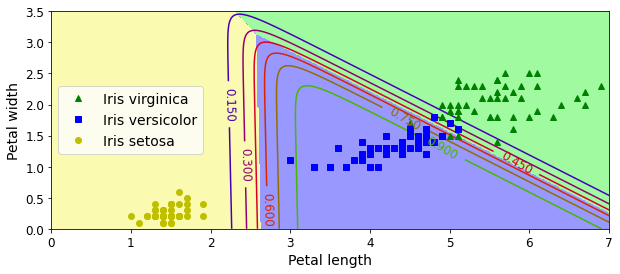

In [112]:
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

plt.show()

In [113]:
softmax_reg.predict([[5, 2]])

array([2])

In [116]:
softmax_reg.predict_proba([[5, 2]]) # 꽃잎 길이 5, 너비 2인 클래스 94.2% Iris-Virginica

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])